# K-Means

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


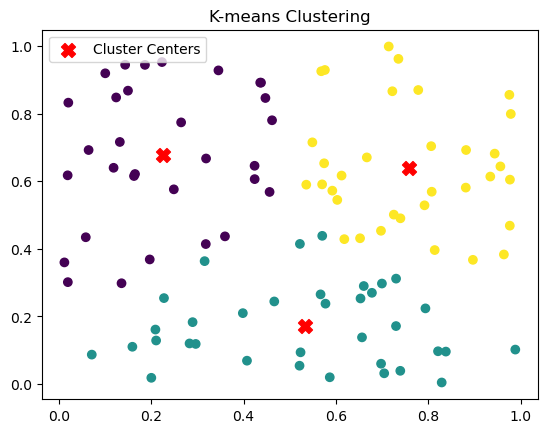

In [2]:
#Generate some random data points
np.random.seed(0)
data = np.random.rand(100,2)

#Number of clusters
k = 3

#Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

#Fit the model to the data
kmeans.fit(data)

#Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

#Plot the data points and cluster centers
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c = 'red',marker='X',s=100,label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [3]:
data[:,0]

array([0.5488135 , 0.60276338, 0.4236548 , 0.43758721, 0.96366276,
       0.79172504, 0.56804456, 0.07103606, 0.0202184 , 0.77815675,
       0.97861834, 0.46147936, 0.11827443, 0.14335329, 0.52184832,
       0.26455561, 0.45615033, 0.0187898 , 0.61209572, 0.94374808,
       0.3595079 , 0.6976312 , 0.66676672, 0.21038256, 0.31542835,
       0.57019677, 0.98837384, 0.20887676, 0.65310833, 0.46631077,
       0.15896958, 0.65632959, 0.19658236, 0.82099323, 0.83794491,
       0.97645947, 0.97676109, 0.73926358, 0.28280696, 0.2961402 ,
       0.31798318, 0.0641475 , 0.56660145, 0.52324805, 0.5759465 ,
       0.31856895, 0.13179786, 0.28940609, 0.58651293, 0.82894003,
       0.67781654, 0.73519402, 0.24875314, 0.59204193, 0.22308163,
       0.44712538, 0.69947928, 0.81379782, 0.8811032 , 0.88173536,
       0.72525428, 0.95608363, 0.42385505, 0.0191932 , 0.66017354,
       0.61801543, 0.13547406, 0.56996491, 0.57432525, 0.65210327,
       0.8965466 , 0.43586493, 0.80619399, 0.10022689, 0.71424

# Tokenization

In [3]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [4]:
#Download the stopwords and punkt tokenizer data from NLTK
#K-Mean Clustering on text data
#Numpy changes the tokenized words into clusters
#Clusters are initialized using K-mean and plotted on the graph
nltk.download('stopwords')
nltk.download('punkt')

text_data = ["Natural language processing is a subfield of artificial intelligence.",\
"Text mining involves extracting meaningful information from unstructured text data.",\
"Hachine learning algorithms can be applied to analyze text data.",\
"NLP tasks include sentiment analysis, named entity recognition, and language translation.",\
"K-means clustering is a popular unsupervised machine learning algorithm.",\
"K-means is better than support vector machine."
            ]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#Preprocess the text data using word tokenization method in nltk

def preprocess_text(text_data):
    stop_words = set(stopwords.words('english'))
    preprocessed_data = []
    for text in text_data:
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        preprocessed_data.append(filtered_words)
    return preprocessed_data
preprocessed_data = preprocess_text(text_data)
print(preprocessed_data)

[['natural', 'language', 'processing', 'subfield', 'artificial', 'intelligence'], ['text', 'mining', 'involves', 'extracting', 'meaningful', 'information', 'unstructured', 'text', 'data'], ['hachine', 'learning', 'algorithms', 'applied', 'analyze', 'text', 'data'], ['nlp', 'tasks', 'include', 'sentiment', 'analysis', 'named', 'entity', 'recognition', 'language', 'translation'], ['clustering', 'popular', 'unsupervised', 'machine', 'learning', 'algorithm'], ['better', 'support', 'vector', 'machine']]


In [6]:
#Convert the preprocessed data to numerical vectors using one-hot encoding
unique_words = sorted(set(word for sublist in preprocessed_data for word in sublist))
one_hot_vectors = np.zeros((len(preprocessed_data),len(unique_words)))
for i, words in enumerate(preprocessed_data):
    for word in words:
        one_hot_vectors[i,unique_words.index(word)] = 1
one_hot_vectors

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.,

In [7]:
#Number of clusters
k = 6

#Initialize the Kmeans model
kmeans = KMeans(n_clusters=k)

#Data initialization --> Model fitting --> Data labelling
# --> Data Plotting --> Data Visualization
kmeans.fit(one_hot_vectors)

#Get the cluster centers and labels
centers = kmeans.cluster_centers_

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 4 3 2 1 5]


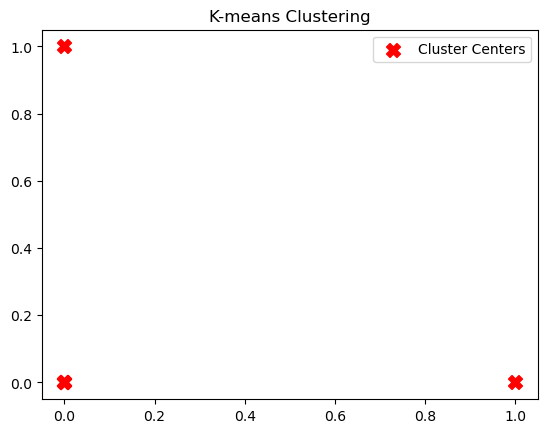

In [8]:
labels = kmeans.labels_
#Plot the data points and cluster centers

plt.scatter(centers[:,0],centers[:,1],c = 'red',marker='X',s=100,label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()